## Making Healthy Breakfast Decisions - Choosing your cereal!

What are you getting when you eat a bowl of cereal? Can you get a lot of fiber without a lot of calories? Can you describe what cereals are displayed on high, low, and middle shelves? The good news is that none of the cereals for which we collected data had any cholesterol, and manufacturers rarely use artificial sweeteners and colors, nowadays. However, there is still a lot of data for the consumer to understand while choosing a good breakfast cereal. 


Data Source: http://lib.stat.cmu.edu/datasets/1993.expo/

Data: http://lib.stat.cmu.edu/datasets/1993.expo/cereal

Meta data is given below, suggest use is the variable name supplied in square brackets. 

Meta Data: 
- Breakfast cereal variables: cereal name [name]

- manufacturer (e.g., Kellogg's) [mfr]

- type (cold/hot) [type] 

- calories (number) [calories]

- protein(g) [protein]

- fat(g) [fat]

- sodium(mg) [sodium]

- dietary fiber(g) [fiber]

- complex carbohydrates(g) [carbo]

- sugars(g) [sugars]

- display shelf (1, 2, or 3, counting from the floor) [shelf]

- potassium(mg) [potass] 

- vitamins & minerals (0, 25, or 100, respectively indicating 
'none added'; 'enriched, often to 25% FDA recommended'; '100% of 
FDA recommended') [vitamins]

- weight (in ounces) of one serving (serving size) [weight]
cups per serving [cups]

Manufacturers are represented by their first initial: A=American Home Food Products, G=General Mills, K=Kelloggs, N=Nabisco, P=Post, Q=Quaker Oats, R=Ralston Purina) 

One possible task is to develop a graphic that would allow the consumer to quickly compare a particular cereal to other possible choices. Some additional questions to consider, and try to answer with effective graphics:

1. Can you find the correlations you might expect? Are there any surprising correlations?
2. What is the true "dimensionality" of the data?
3. Are there any cereals which are virtually identical?
4. Is there any way to discriminate among the major manufacturers by cereal characteristics, or do they each have a "balanced portfolio" of cereals?
5. Do the nutritional claims made in cereal advertisements stand the scrutiny of data analysis?
6. Are there cereals which are clearly nutritionally superior, or inferior? Are there clusters of cereals?
7. Is a ranking or scoring scheme possible or reasonable, and if so, are there cereals which are nutritionally superior or inferior under all reasonable weighting schemes?

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('cereal.csv',sep=';')
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Let's review the data by looking at its shape, and descriptive statistics:

In [3]:
data.shape

(77, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


## How can we reduce the number of dimensions to make it easier to select a cereal brand?

#### Focusing our attention to calories and consumer rating:

In [6]:
calories_avg = data['calories'].mean()
rating_avg = data['rating'].mean()
round(calories_avg,2), round(rating_avg,2)

(106.88, 42.67)

#### How are these two variables related?

Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the **covariance**. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).


In [7]:
covariance = np.cov(data['calories'], data['rating'])
covariance

array([[ 379.63089542, -188.68156228],
       [-188.68156228,  197.32632105]])

The diagonal of the matrix contains the covariance between each variable and itself. The other values in the matrix represent the covariance between the two variables; in this case, the remaining two values are the same given that we are calculating the covariance for only two variables.However, this is difficult to interpret.

The **Pearson correlation coefficient** can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score (when absolute value above 0.5 and close to 1.0 then it is high level of correlation).

In [8]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['calories'], data['rating'])
round(corr,2)

-0.69

We see a strong negative correlation between calories and rating, 69% of the total variation in both variables is "covariation" or variation in one variable that is duplicated by similar variation in the other variable. This can help us reduce the number of variables, for example by using PCA. We'll answer which variables explain the most variability in the data?

```379.63 + 197.32 = 577``` is the total variance. ```379.63/577 = 66% ``` of the variation is explained in calories, and ```34% ```with rating.

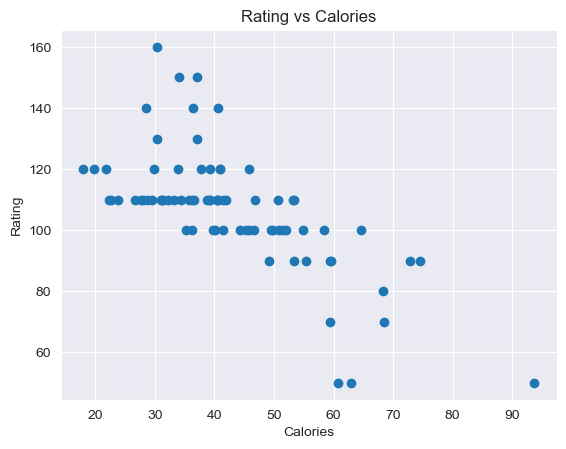

In [9]:
plt.scatter(data['rating'],data['calories'])
plt.title("Rating vs Calories")
plt.ylabel("Rating")
plt.xlabel("Calories")
plt.show()

## PCA

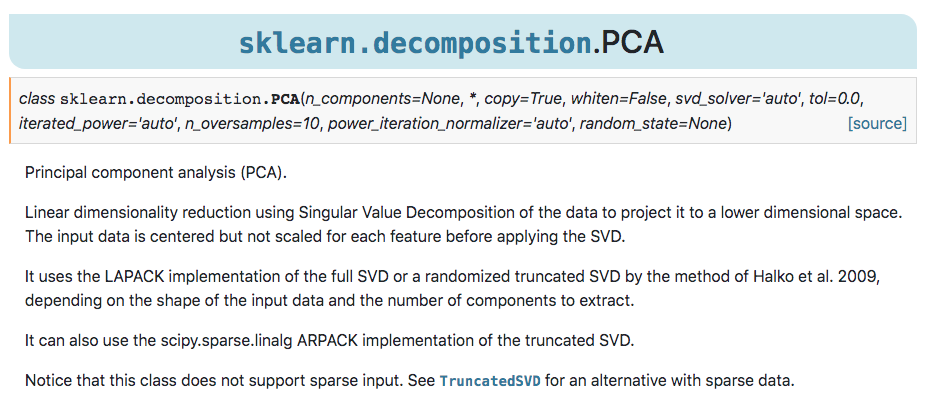

In [10]:
X = data[['calories','rating']]
pcs = PCA(n_components=2)
pcs.fit(X)

PCA(n_components=2)

The fit function learns some quantities from the data, most importantly the "components" and "explained variance":

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

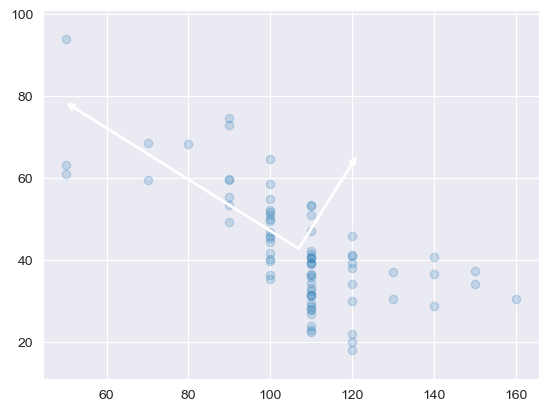

In [12]:
# plot data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2) # alpha controls the transparency
for length, vector in zip(pcs.explained_variance_, pcs.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pcs.mean_, pcs.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

Transformation from data axes to principal aces is an affine transformation, it means transformation composed of a translation, rotation, and uniform scaling steps.

#### Reallocated Variance as a Result of PCA

```
explained_variance_ndarray of shape (n_components,)

The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.

In [13]:
pcs.explained_variance_

array([498.02447768,  78.93273879])

```
explained_variance_ratio_ndarray of shape (n_components,)

Percentage of variance explained by each of the selected components.```

In [14]:
pcs.explained_variance_ratio_

array([0.86319135, 0.13680865])

First principle component explains 86% of the variation, and second principle component explains 13% of the variance in the dataset.

#### Calculating the Principle Component Scores (projected values of calories and ratings onto the new axes)

use ```pca.transform``` or use
```
components_: ndarray of shape (n_components, n_features)

Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.

In [15]:
# weights of the principal components
pcs.components_

array([[-0.84705348,  0.53150766],
       [ 0.53150766,  0.84705348]])

Manually calculating the score for first cereal:

In [16]:
n0 = data['name'].iloc[0]
c0 = data[['calories','rating']].iloc[0]['calories']
r0 = data[['calories','rating']].iloc[0]['rating']
print (n0,c0,r0)

100% Bran 70.0 68.402973


In [17]:
# First principal component score
pcs.components_[0][0] * (c0 - calories_avg) + \
    pcs.components_[0][1] * ((r0 - rating_avg))

44.92152781828534

Automated using ```pca.transform```

In [18]:
scores = pd.DataFrame(pcs.transform(data[['calories','rating']]),
                     columns=['PC1','PC2'])
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


In [22]:
pcsSummary=pd.DataFrame({'Standard deviation':np.sqrt(pcs.explained_variance_)
                   ,'Proportion of variance':pcs.explained_variance_ratio_
                   ,'Cumulative proportion':np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns=['PC1','PC2']
pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,22.316462,8.884410
Proportion of variance,0.863191,0.136809
Cumulative proportion,0.863191,1.000000


In [23]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose()
                                , columns=['PC1','PC2']
                                , index=['calories','rating'])

pcsComponents_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


#### Further reducing the dimensions to 1

original shape:    (77, 2)
transformed shape: (77, 1)


array([0.86319135])

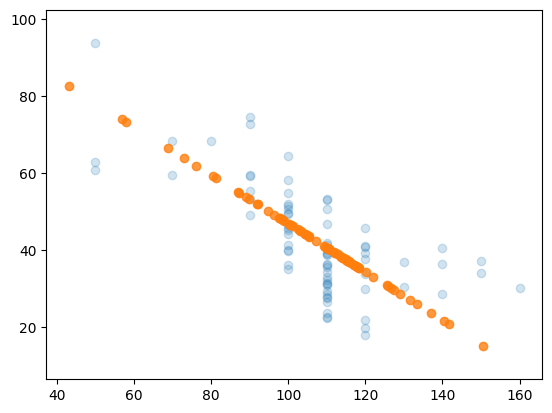

In [24]:
pca = PCA(n_components=1)
#pca.fit(X)
X_pca = pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
pca.explained_variance_ratio_

original shape:    (77, 13)
transformed shape: (77, 1)


array([0.54380618])

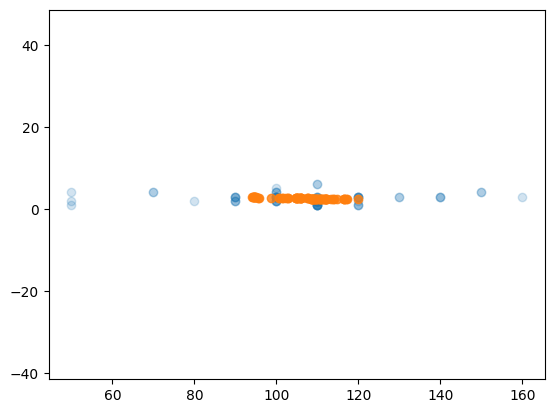

In [25]:
X = data.iloc[:,3:]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
pca.explained_variance_ratio_

The information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points. Even with reducing dimensions from 13 features to 1, we are still able to explain 54% of the variation in data. 